In [2]:
import pandas as pd
import numpy as np

# load data
walkScore = pd.read_csv("https://data.wprdc.org/dataset/4d3d4324-b32a-4519-b56f-cee2340057bf/resource/"
                                       + "682b1df1-a63b-4413-9362-ba077af63baa/download/walkscorect.xls-walk-score-by-ct.csv")
censusTract = pd.read_csv("https://data.wprdc.org/datastore/dump/9756af5f-3320-4601-84e2-347d64071e25")

# Display the data table for Walk Score
walkScore

,Census Tract,Walk Score
0,10300,82
1,20100,100
2,20300,83
3,30500,77
4,40200,71
...,...,...
397,981000,54
398,981100,51
399,981200,75
400,981800,35


In [3]:
# Display the data table for census tracts
censusTract

,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,aland10,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,shape_area,shape_length
0,1,42,3,40500,1,420030405001,Block Group 1,G5030,S,268195,...,7,40500,2,2775,2985,92.964824,92.96,Yes,5.079492e+06,10442.036450
1,2,42,3,40400,1,420030404001,Block Group 1,G5030,S,75472,...,6,40400,2,1365,2020,67.574257,67.57,Yes,2.105489e+06,6609.688123
2,3,42,3,40200,2,420030402002,Block Group 2,G5030,S,282679,...,5,40200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081
3,4,42,3,30500,2,420030305002,Block Group 2,G5030,S,284548,...,4,30500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444
4,5,42,3,980000,1,420039800001,Block Group 1,G5030,S,637235,...,125,980000,1,65,220,29.545455,29.54,No,7.764866e+06,13581.875089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,42,3,270100,2,420032701002,Block Group 2,G5030,S,604710,...,94,270100,2,945,2475,38.181818,38.18,No,1.107355e+07,14197.343518
134,135,42,3,980900,1,420039809001,Block Group 1,G5030,S,1453388,...,133,980900,2,0,0,0.000000,0.00,No,1.564899e+07,29884.799775
135,136,42,3,250700,1,420032507001,Block Group 1,G5030,S,560320,...,85,250700,1,555,765,72.549020,72.54,Yes,6.050817e+06,11709.518764
136,137,42,3,270400,1,420032704001,Block Group 1,G5030,S,395541,...,96,270400,1,675,1035,65.217391,65.21,Yes,4.256393e+06,9062.212499


In [4]:
# Delete all columns except census tract numbers and neighborhood names
censusTract = censusTract.loc[:, ('tractce10', 'hood')]

# Display the modified version of censusTract
censusTract

,tractce10,hood
0,40500,Central Oakland
1,40400,North Oakland
2,40200,West Oakland
3,30500,Crawford-Roberts
4,980000,Lincoln-Lemington-Belmar
...,...,...
133,270100,Brighton Heights
134,980900,Marshall-Shadeland
135,250700,California-Kirkbride
136,270400,Marshall-Shadeland


In [5]:
# Rename the census tract number column of censusTract in order to merge the two data tables.
censusTract.rename(columns={'tractce10' : 'Census Tract'}, inplace=True)

# Merge the two data tables.
walkScore = pd.merge(censusTract, walkScore)

# Display the new data table. 
walkScore

,Census Tract,hood,Walk Score
0,40500,Central Oakland,78
1,40400,North Oakland,82
2,40200,West Oakland,71
3,30500,Crawford-Roberts,77
4,980000,Lincoln-Lemington-Belmar,72
...,...,...,...
133,270100,Brighton Heights,48
134,980900,Marshall-Shadeland,35
135,250700,California-Kirkbride,58
136,270400,Marshall-Shadeland,48


In [14]:
walkScore = walkScore.groupby('hood').mean().reset_index()
walkScore.sort_values(by = ['Walk Score'], ascending = False).head(20)


,hood,Census Tract,Walk Score
13,Central Business District,20100.0,100.000000
38,Lower Lawrenceville,60300.0,91.000000
55,Polish Hill,60500.0,88.000000
57,Shadyside,70620.0,86.600000
26,Friendship,80700.0,86.000000
15,Central Northside,235450.0,86.000000
0,Allegheny West,562700.0,86.000000
7,Bloomfield,82480.0,84.400000
69,Strip District,20300.0,83.000000
8,Bluff,10300.0,82.000000


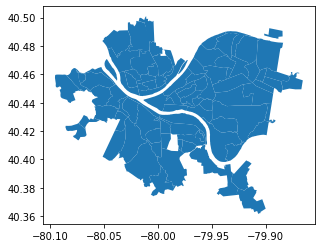

In [15]:
import geopandas
%matplotlib inline

# Read in the shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
# Plot the geopandas dataframe
neighborhoods.plot()

In [16]:
# Merging Walk Score data with the neighborhood map
walkScore_map = neighborhoods.merge(walkScore, how='left')
# Look at the head to confirm it merged correctly
walkScore_map[['hood','Walk Score','geometry']].head()

,hood,Walk Score,geometry
0,Central Oakland,76.500000,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,79.666667,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,71.000000,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,77.000000,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,83.000000,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


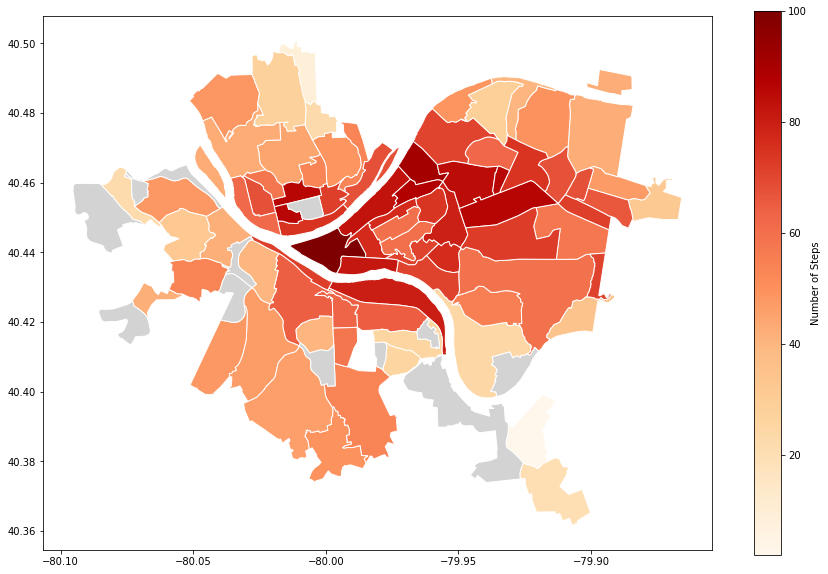

In [17]:
# Draw the map according to Walk Scores
walkScore_map.plot(column='Walk Score',
               cmap='OrRd', 
               edgecolor="white", 
               legend=True, 
               legend_kwds={'label': "Number of Steps"}, 
               figsize=(15, 10), 
               missing_kwds={"color": "lightgrey"} 
               )

# 